<a href="https://colab.research.google.com/github/sskamalapurkar/Unsupervised_ML_Clustering/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Online Retail Customer Segmentation**



##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual


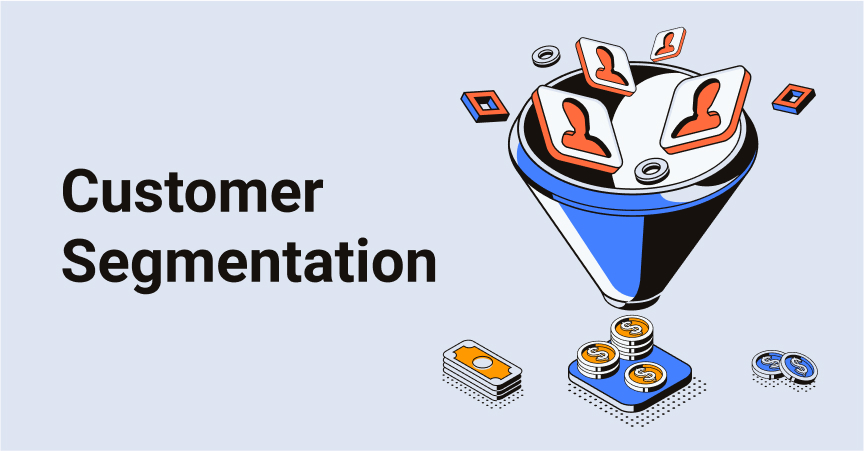

# **Project Summary -**

Companies aim to gain a deeper approach of the customer they are targeting. Therefore, their aim must be specific and should be tailored to address the requirements of every individual customer. Furthermore, through the data collected, companies can gain a deeper understanding of customer preferences as well as the requirements for discovering valuable segments that would reap them maximum profit. This way, they can strategize their marketing techniques more efficiently and minimize the possibility of risk to their investment.



---





**Data Preprocessing:**

* Sourcing the dataset
* Importing libraries and dataset in colab
* Understanding the dataset
* Finding null and duplicate values
* Outlier detection and treatment
* Feature engineering


---


**Exploratory Data Analysis (EDA) on features:**

* Which products are the most and least sold ones?

* Which are the most revenue generating products?

* Which day had the most and least number of purchases?

* On which days most of the revenue generates?

* Which month had the most and least number of purchases?

* In terms of revenue generation, which month is most important?

* Which hour in a day had the most and least number of purchases?

* In which time of the day highest revenue is generated?

* Which countries has the most number of customers?

* Which are the most spending customers?

* Distribution of the numerical features.


---


**Clustering Algorithms used:**

* RFM Modeling and Analysis
* K-Means Algorithm 
* Elbow Method
* Silhouette Method
* Cohort Analysis
---


# **GitHub Link -**

https://github.com/sskamalapurkar/Unsupervised_ML_Clustering

# **Problem Statement**


**In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.**

**In this project, we are required to :**


*   Understand the Dataset & cleanup (if required)

*   Implement clustering model to segment the customer-based similarity

*   find optimal number of clusters

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [43]:
# Import Libraries

import pandas as pd
import numpy as np
from numpy import math
import datetime as dt

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Clustering Algorithms
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# Load Dataset

file_path = '/content/drive/MyDrive/Unsupervised ML - Clustering/Online Retail.xlsx'
DataFrame = pd.read_excel(file_path)
df = DataFrame.copy()

### Dataset First View

In [46]:
# Dataset First Look

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [47]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

In [48]:
print("Total retail transactions including each product in every transactions (Rows): ", df.shape[0])
print("Number of features (Columns): ", df.shape[1])

Total retail transactions including each product in every transactions (Rows):  541909
Number of features (Columns):  8


### Dataset Information

In [49]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [50]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


#### Missing Values/Null Values

In [51]:
# Missing Values/Null Values Count

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

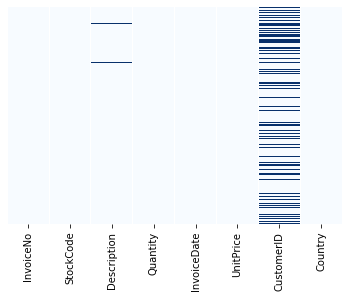

In [52]:
# Visualizing the missing values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')
plt.rcParams['figure.figsize'] = (15, 10)

### What did you know about your dataset?

* **The number of duplicate values in the dataset is -  5268**

* **Only 2 columns have null values in it. Description and CustomerID.**



## ***2. Understanding Your Variables***

In [53]:
# Dataset Columns

df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [54]:
# Dataset Describe

df.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


### Variables Description 


|Field Name|Description|
|---|---|
|**InvoiceNo:**|Invoice number. A 6-digit integer number uniquely assigned to each transaction.
||If this code starts with letter 'c', it indicates a cancellation.|
|**StockCode:**|Product (item) code. A 5-digit integer number uniquely assigned to each distinct product.|
|**Description:**|Product (item) name|
|**Quantity:**|The quantities of each product (item) per transaction.|
|**InvoiceDate:**|Invice Date and time. The day and time when each transaction was generated.|
|**UnitPrice:**|Unit price. Product price per unit in sterling.|
|**CustomerID:**|Customer number. A 5-digit integral number uniquely assigned to each customer.|
|**Country:**|Country name. The name of the country where each customer resides.|




---


* **There are 4 features whose datatype is object, 2 features whose datatype is float64, 1 feature whose datatype is datetime64 and 1 feature whose datatype is int64.**

* **Memory usage by the dataset is 33.1 MB.**

* **There are 4070 unique product codes. '85123A' is the most common product code appeared 2301 times.**

* **Majority of customers resides in United Kingdom.**

### Check Unique Values for each variable.

In [55]:
# Check Unique Values for each variable.

df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

*   **For 4070 products, there are 25900 transactions in the data. This means that each product is likely to have multiple transactions in the data. There are almost as many products as customers in the data as well.**

*   **In the dataset, we have retail transactions from almost 38 different countries of the world.**

*   **Almost 25900 overall transactions, this includes cancelled transactions too.**

*   **Also, 4223 different items are listed in the dataset.**

*   **Overall customer count in the available dataset is 4372.**

## 3. ***Data Wrangling***

### Data Wrangling Code

In [56]:
# Write your code to make your dataset analysis ready.

# Remove duplicates
df = df.drop(index=df[df.duplicated()].index)
print("Number of rows after removal of duplicates : {}".format(df.shape[0]))



Number of rows after removal of duplicates : 536641


In [57]:
# Inspect min and max Quantity transactions
df.loc[(df['Quantity']==-80995) | (df['Quantity']==80995)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


**Invoice No. 581483 of 80995 quantity sell of stock code 23843 is reversed by adding a contra entry. Invoice No. of such reversal/cancelled entries starts with letter 'C'**

In [58]:
# Cancelled/Reversed invoices
print("Cancelled invoices/transactions : {}".format(df[df['InvoiceNo'].astype(str).str[0] == 'C'].shape[0]))

df = df[df['InvoiceNo'].astype(str).str[0] != 'C']
df.shape

Cancelled invoices/transactions : 9251


(527390, 8)

In [59]:
#Remove transactions with missing customer ids
df = df.drop(index=df[df['CustomerID'].isnull()].index)
print("Retail transactions after removing missing customer ids  : {}".format(df.shape[0]))

Retail transactions after removing missing customer ids  : 392732


**Outlier Detection and treatment**

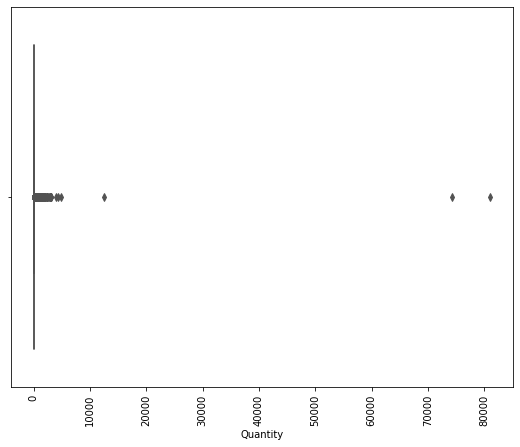

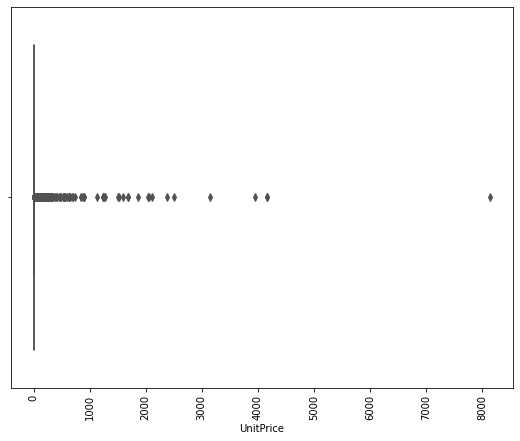

In [60]:
#creating function for visualizing outliers by boxplot

def drawplot(col):
   plt.figure(figsize=(9,7))
   sns.boxplot(df[col],palette='plasma')
   plt.xticks(rotation='vertical')

toview=['Quantity','UnitPrice']
for col in toview:
    drawplot(col)
     

In [61]:
# Creating a function to remove outliers

def remove_outliers(data , column):
  '''Removes outliers in given the dataframe and column'''
  q3 = data[column].quantile(0.75)
  q1 = data[column].quantile(0.25)
  iqr = q3 - q1
  upper_limit = q3 + (1.5 * iqr)
  lower_limit = q1 - (1.5 * iqr)

  if lower_limit < 0:
    data = data[data[column] <= upper_limit]
  else:
    data = data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]   
  
  return data

In [62]:
# Removing the outliers using the function created

df = remove_outliers(data = df, column = 'Quantity')
df = remove_outliers(data = df, column = 'UnitPrice')

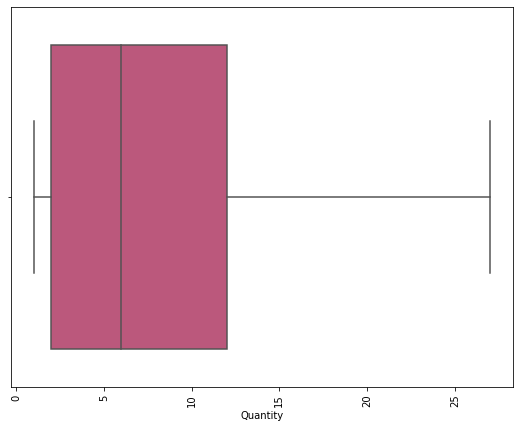

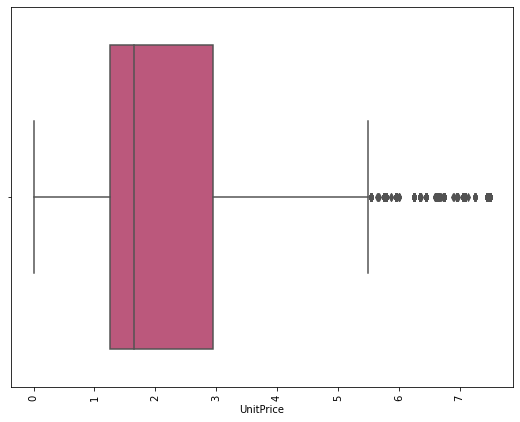

In [63]:
# checking again with boxplot

toview=['Quantity','UnitPrice']
for col in toview:
    drawplot(col)

In [64]:
df.shape

(333265, 8)

### What all manipulations have you done and insights you found?

* So, finally we have 333265 rows and 8 columns in the dataset.

* We have dropped all rows with NaN CustomerID. As we have to deal with customer segmentation in future, we need only those rows where CustomerID is present.

* Also we have removed all duplicate rows as well, as they are of no use to us.


* We have removed all outliers from Quantity and Unit Price columns. Observations from boxplot:

  1. Median of Quantity is 6 and most of the quantities lie between 2 to 12.

  2. 50th percentile for unit price is approx 1.75, and most of the unit prices are between 1.25 to 3.

# **Feature Engineering**

---




We are going to extract more information from the available columns before proceeding to EDA. In the given data, we have very few columns, that is features, hence we will try to create new columns based on available information so as to get more meaningful features for analysing customer behaviour.

In [65]:
#InvoiceDate column has date and time, which we will separate as month, day and hour respectively

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['Month'] = df['InvoiceDate'].dt.month
df['day_name'] = df['InvoiceDate'].dt.day_name()
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

In [66]:
#creating a function to categorise hours in three slots

def day_time(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

      
#creating new column which provides hour slots into three categories

df['day_time']=df['Hour'].apply(day_time)

In [67]:
# From quantity and unit price, we can calculate total sales amount for that perticular transaction

df['Sales_Amount'] = df['Quantity'] * df['UnitPrice']

Customer ID is 5 digit integer number, but in our data column contains float values. So, we will be converting Customer ID from float to int.

In [68]:
# Customer ID - float to int conversion

df['CustomerID'] = df['CustomerID'].apply(int)

In [69]:
# Check the dataset again

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,day_name,Day,Hour,day_time,Sales_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12,Wednesday,1,8,Morning,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,Wednesday,1,8,Morning,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12,Wednesday,1,8,Morning,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,Wednesday,1,8,Morning,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,Wednesday,1,8,Morning,20.34


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
**Which products are the most and least sold ones?**

WHITE HANGING HEART T-LIGHT HOLDER    1668
JUMBO BAG RED RETROSPOT               1327
PARTY BUNTING                         1268
LUNCH BAG RED RETROSPOT               1195
ASSORTED COLOUR BIRD ORNAMENT         1146
Name: Description, dtype: int64


Text(0, 0.5, 'product Name')

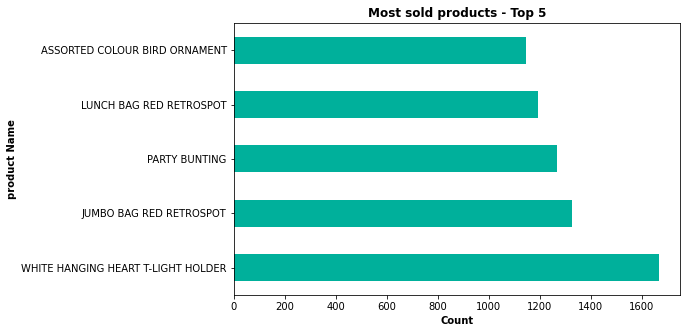

In [70]:
# Chart - 1 visualization code

product_df_top = df['Description'].value_counts()[:5]
print(product_df_top)
product_df_top.plot.barh(color = '#00b09b',figsize=(8,5))

#labelling the axes
plt.title("Most sold products - Top 5", weight ='bold')
plt.xlabel("Count", weight='bold')
plt.ylabel('product Name', weight='bold')

In [71]:
product_df_bottom = df['Description'].value_counts()[-5: ]
print(product_df_bottom)

M/COLOUR POM-POM CURTAIN               1
BLUE/GREEN SHELL NECKLACE W PENDANT    1
 I LOVE LONDON MINI RUCKSACK           1
SET 36 COLOURING PENCILS DOILEY        1
RECYCLED ACAPULCO MAT RED              1
Name: Description, dtype: int64


##### 1. Why did you pick the specific chart?

To check the products having highest demand.

##### 2. What is/are the insight(s) found from the chart?

Most sold product is - **WHITE HANGING HEART T-LIGHT HOLDER**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, of course! From this the company can decide the strategies for top 10 products to get maximum profit out of it.

#### Chart - 2
**Which are the most revenue generating products?**

Description
PARTY BUNTING                         34952.85
WHITE HANGING HEART T-LIGHT HOLDER    31763.76
JUMBO BAG RED RETROSPOT               24923.50
SPOTTY BUNTING                        23513.05
ASSORTED COLOUR BIRD ORNAMENT         22940.06
Name: Sales_Amount, dtype: float64


Text(0, 0.5, 'product Name')

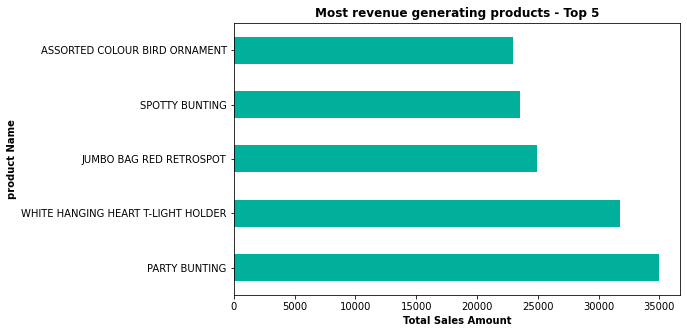

In [72]:
# Chart - 2 visualization code

most_revenue_product_df = df.groupby('Description')['Sales_Amount'].sum().sort_values(ascending=False).head(5)
print(most_revenue_product_df)
most_revenue_product_df.plot.barh(color = '#00b09b',figsize=(8,5))

#labelling the axes
plt.title("Most revenue generating products - Top 5", weight ='bold')
plt.xlabel("Total Sales Amount", weight='bold')
plt.ylabel('product Name', weight='bold')

##### 1. Why did you pick the specific chart?

To visualize the products gaining max revenue to the company.

##### 2. What is/are the insight(s) found from the chart?

* Most revenue generating product is - **PARTY BUNTING**

* PARTY BUNTING is the third highest selling product with highest revenue generator

* WHITE HANGING HEART T-LIGHT HOLDER is the top selling product with second highest revenue generator

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the company can revise pricing strategies for top 10 products based on their demand in the market.

#### Chart - 3
**Which day had the most and least number of purchases?**

Thursday     66124
Wednesday    56838
Tuesday      55374
Monday       54609
Sunday       54452
Friday       45868
Name: day_name, dtype: int64


Text(0, 0.5, 'Count')

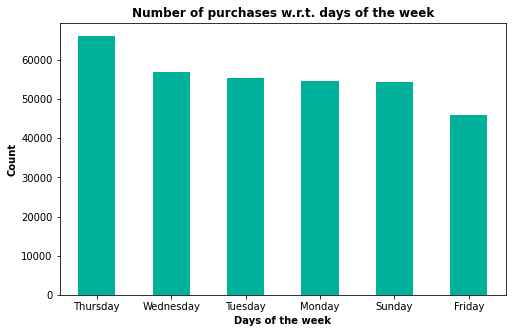

In [73]:
# Chart - 3 visualization code

days_df_top = df['day_name'].value_counts()
print(days_df_top)
days_df_top.plot.bar(color = '#00b09b',figsize=(8,5))

#labelling the axes
plt.xticks(rotation = 0)
plt.title("Number of purchases w.r.t. days of the week", weight ='bold')
plt.xlabel("Days of the week", weight='bold')
plt.ylabel('Count', weight='bold')

##### 1. Why did you pick the specific chart?

To see the days on which maximum transactions are happening.

##### 2. What is/are the insight(s) found from the chart?

* Thursday is the most busiest day, on which max transaction are done, followed by Wednesday. Tuesday, Monday and Sunday have approx equal number of transactions.

* There are no transactions on Saturdays.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the company can provide expensive products on busy days of the week to get more benefit.

#### Chart - 4
**On which days most of the revenue generates?**

day_name
Thursday     927269.410
Wednesday    771937.560
Tuesday      744324.301
Monday       702198.861
Friday       647459.811
Sunday       506286.241
Name: Sales_Amount, dtype: float64


Text(0, 0.5, 'Total Sales Amount')

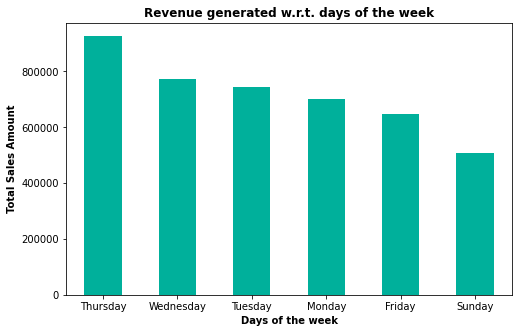

In [74]:
# Chart - 4 visualization code

days_revenue_df = df.groupby('day_name')['Sales_Amount'].sum().sort_values(ascending=False)
print(days_revenue_df)
days_revenue_df.plot.bar(color = '#00b09b',figsize=(8,5))

#labelling the axes
plt.xticks(rotation = 0)
plt.title("Revenue generated w.r.t. days of the week", weight ='bold')
plt.xlabel("Days of the week", weight='bold')
plt.ylabel('Total Sales Amount', weight='bold')

##### 1. Why did you pick the specific chart?

To check on the days of the week on which max revenue is generating.

##### 2. What is/are the insight(s) found from the chart?

* Friday was the day on which lowest number of purchases are done, but still in terms of revenue generation Friday is second lowest day of the week. This means that on Friday, products sold were having higher quantity or unit price than Sunday.

* Thursday was the day on which maximum transactions are done, so it was obvious that revenue generation is al expected to be higher compared to other days of the week.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, indeed! This will surely help creating a positive business impact.

#### Chart - 5

**Which month had the most and least number of purchases?**

11    55217
10    42151
12    36468
9     33973
5     23151
8     22482
3     22448
7     22397
6     22317
4     18824
1     17457
2     16380
Name: Month, dtype: int64


Text(0, 0.5, 'Count')

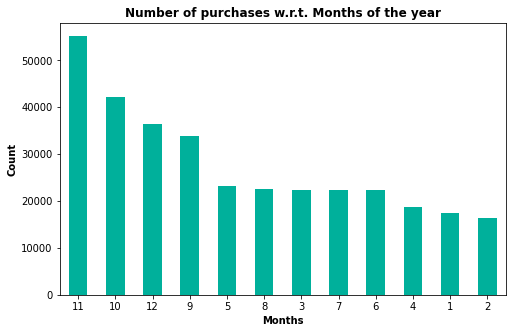

In [78]:
# Chart - 5 visualization code

months_df_top = df['Month'].value_counts()
print(months_df_top)
months_df_top.plot.bar(color = '#00b09b',figsize=(8,5))

#labelling the axes
plt.xticks(rotation = 0)
plt.title("Number of purchases w.r.t. Months of the year", weight ='bold')
plt.xlabel("Months", weight='bold')
plt.ylabel('Count', weight='bold')

##### 1. Why did you pick the specific chart?

To check on months in which max transactions are done.

##### 2. What is/are the insight(s) found from the chart?

**September to December are the months in which highest number of purchases are happening.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can keep a wide range of gift items which are related to other important festivals happening in first half of the year. So that, the purchases will be more in those months and so  as revenue generation.

#### Chart - 6

**In terms of revenue generation, which month is most important?**

Month
11    642984.880
10    524843.470
9     480898.852
12    461547.900
5     324899.440
8     305233.840
6     290158.850
7     289068.991
3     285458.420
4     242420.681
1     232767.980
2     219192.880
Name: Sales_Amount, dtype: float64


Text(0, 0.5, 'Total Sales Amount')

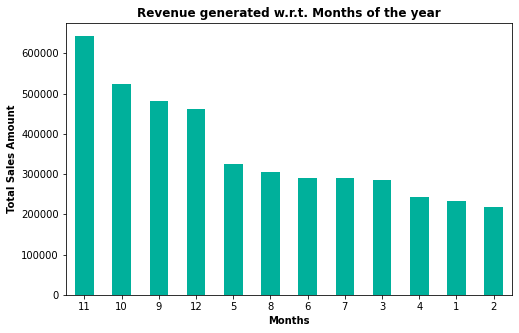

In [79]:
# Chart - 6 visualization code

months_revenue_df = df.groupby('Month')['Sales_Amount'].sum().sort_values(ascending=False)
print(months_revenue_df)
months_revenue_df.plot.bar(color = '#00b09b',figsize=(8,5))

#labelling the axes
plt.xticks(rotation = 0)
plt.title("Revenue generated w.r.t. Months of the year", weight ='bold')
plt.xlabel("Months", weight='bold')
plt.ylabel('Total Sales Amount', weight='bold')

##### 1. Why did you pick the specific chart?

To see the revenue generation in all months of the year.

##### 2. What is/are the insight(s) found from the chart?

Same pattern we can see in revenue generation w.r.t. months. September to December, higher number of purchases results in higher revenue.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Indeed! The company can provide wide variety of products as well as some exclusive gift items, so that first two quarters  of the year also yeilds a good amount of revenue.

#### Chart - 7

**Which hour in a day had the most and least number of purchases?**

    Hours  Count
0      12  61044
1      13  54497
2      14  46050
3      11  40956
4      15  38303
5      10  30233
6      16  20500
7       9  17550
8      17  11104
9       8   6964
10     19   2801
11     18   2387
12     20    697
13      7    178
14      6      1


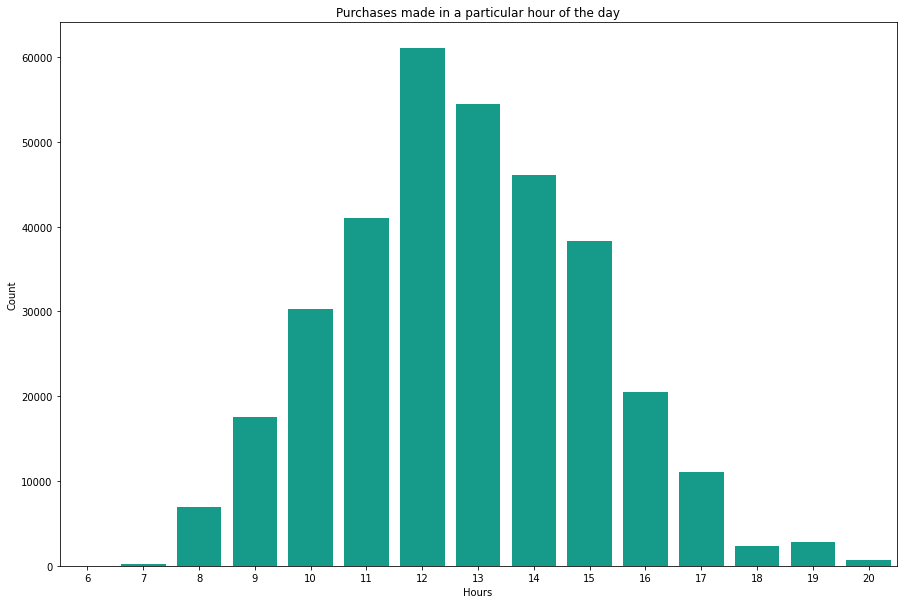

In [80]:
# Chart - 7 visualization code

hour_df = df['Hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hours'}, inplace=True)
hour_df.rename(columns={'Hour': 'Count'}, inplace=True)
print(hour_df)

# plot the number of purchases w.r.t hour of the day
sns.barplot(x='Hours', y='Count', data=hour_df, color = '#00b09b')
plt.title('Purchases made in a particular hour of the day')
plt.show()

##### 1. Why did you pick the specific chart?

To understand the time of the day in which maximum transactions are happening.

##### 2. What is/are the insight(s) found from the chart?

Most of the purchases are happening between 10 AM to 3 PM.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

With some more detailed info, one can understand the purchase time pattern on the site. As this is the online platform, still purchases are very less after 5 pm.

#### Chart - 8

**In which time of the day highest revenue is generated?**

day_time
Afternoon    2741395.942
Morning      1496779.922
Evening        61300.320
Name: Sales_Amount, dtype: float64


Text(0, 0.5, 'Total Sales Amount')

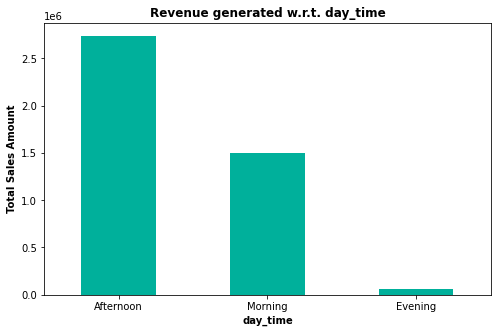

In [81]:
# Chart - 8 visualization code

time_revenue_df = df.groupby('day_time')['Sales_Amount'].sum().sort_values(ascending=False)
print(time_revenue_df)
time_revenue_df.plot.bar(color = '#00b09b',figsize=(8,5))

#labelling the axes
plt.xticks(rotation = 0)
plt.title("Revenue generated w.r.t. day_time", weight ='bold')
plt.xlabel("day_time", weight='bold')
plt.ylabel('Total Sales Amount', weight='bold')

##### 1. Why did you pick the specific chart?

To check the time of the day when maximum revenue generates.

##### 2. What is/are the insight(s) found from the chart?

As we can see, maximum revenue is generated from the purchases made in the afternoon.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The comapny need to focus on the purchases made in the evening as they are generating very less revenue compared to other time of the day.

#### Chart - 9

**Which countries has the most number of customers?**

In [83]:
# Number of customers - countrywise
country_df = df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country':'Count'}, inplace=True)
country_df.head()

,Country_Name,Count
0,United Kingdom,300303
1,Germany,7450
2,France,6891
3,EIRE,5444
4,Spain,2041


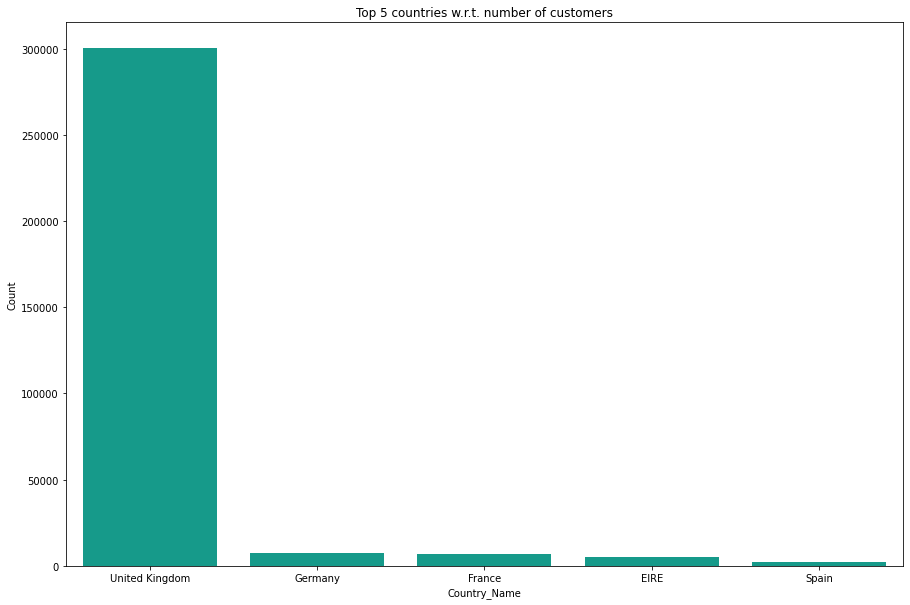

In [84]:
# Chart - 9 visualization code

sns.barplot(x='Country_Name', y='Count', data=country_df[:5], color = '#00b09b')
plt.title('Top 5 countries w.r.t. number of customers')
plt.show()


##### 1. Why did you pick the specific chart?

To see most of the customers are from which country on this online retail platform.

##### 2. What is/are the insight(s) found from the chart?

Out of total customers, lakhs of customers are from United Kingdom, whereas customers from other countries are hardly some thousands.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can do marketing of the online store to countries other than United Kingdom, which will surely gain the profit to the company.

#### Chart - 10

**Which are the most spending customers?**

CustomerID
14911    84980.89
13089    36347.88
14096    36019.84
17841    32224.59
14298    24387.53
12748    20519.88
14156    18276.11
13081    17925.53
15311    17712.96
14088    15700.62
Name: Sales_Amount, dtype: float64


Text(0, 0.5, 'Total Sales Amount')

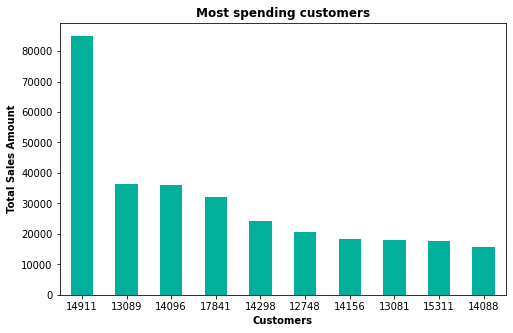

In [85]:
# Chart - 10 visualization code

cust_df = df.groupby('CustomerID')['Sales_Amount'].sum().sort_values(ascending=False)[:10]
print(cust_df)
cust_df.plot.bar(color = '#00b09b',figsize=(8,5))

#labelling the axes
plt.xticks(rotation = 0)
plt.title("Most spending customers", weight ='bold')
plt.xlabel("Customers", weight='bold')
plt.ylabel('Total Sales Amount', weight='bold')

##### 1. Why did you pick the specific chart?

To checkout spending capacities of the different customers.

##### 2. What is/are the insight(s) found from the chart?

CustomerID - 14911 has spent over 80k, which is more than double the amount spent by any customer.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As there were cancelled transactions present in the dataset, we have to get more deeper approach to understand about the revenue. Here for the simplicity we have removed all cancelled transactions.

#### Chart - 11

**Distributions of Numerical features such as - Quantity, UnitPrice and Sales_Amount**

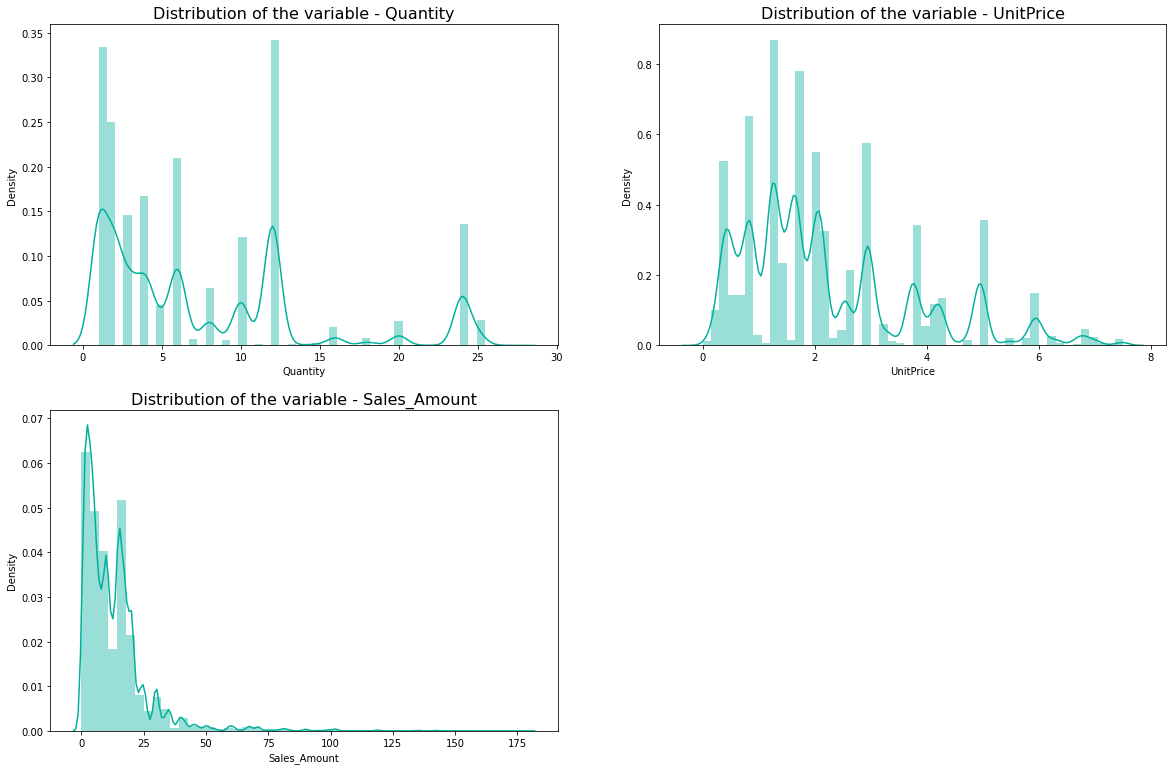

In [86]:
# Chart - 11 visualization code

# plot the distribution of the numerical features
num_features = ['Quantity', 'UnitPrice', 'Sales_Amount']
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(df[feature], color = '#00b09b')
  plt.title(f"Distribution of the variable - {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

##### 1. Why did you pick the specific chart?

To understand the distributions of the numerical quantities.

##### 2. What is/are the insight(s) found from the chart?

* Quantity is discrete numerical variable. 

* From the distribution plot, we can say that unit price for most of the products ranges between 0.5 to 2.5

* Distribution of Sales_Amount is highly right skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Not sure!

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***